IPL Insights

In [1]:
library(ggplot2)
library(gridExtra)
library(dplyr)
df1<-read.csv("../input/deliveries.csv")
df2<-read.csv("../input/matches.csv")
df<-merge(df1, df2, by.x = "match_id", by.y = "id")


Attaching package: ‘dplyr’

The following object is masked from ‘package:gridExtra’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



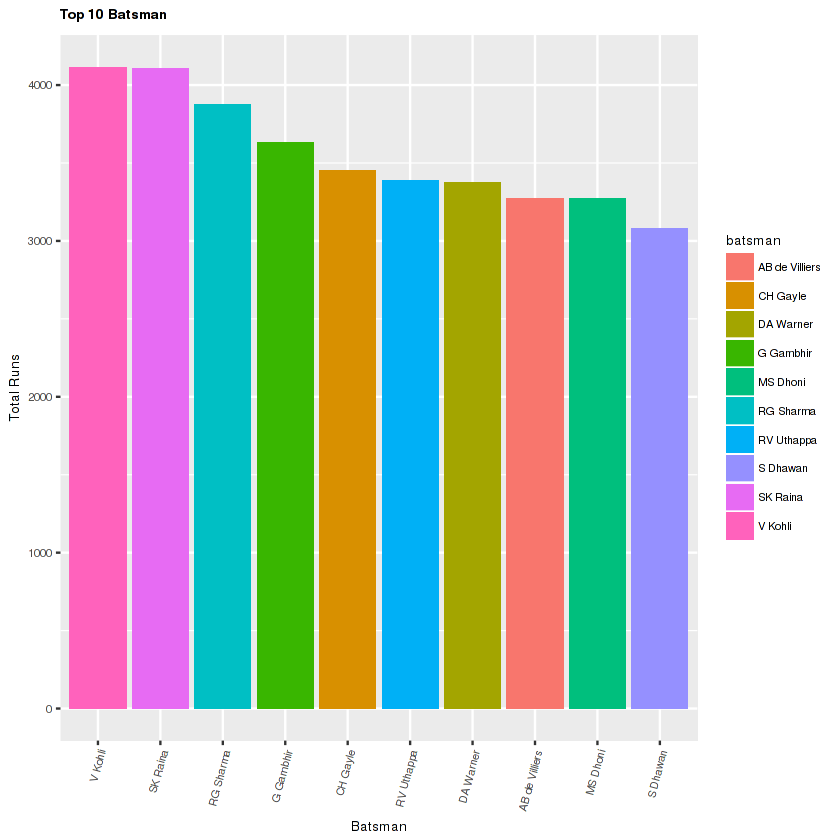

In [2]:
#Top 10 Batsman(Highest Runs)
df1 %>% 
  group_by(batsman) %>% 
  summarise(total_runs = sum(batsman_runs)) %>% 
  arrange(desc(total_runs)) %>% 
  top_n(n = 10, wt = total_runs) %>% 
  ggplot(aes(x = reorder(batsman, -total_runs), y = total_runs))+
  geom_bar(aes(fill = batsman),stat = "identity")+
  labs(list(title = "Top 10 Batsman", x = "Batsman", y = "Total Runs"))+
  theme(axis.text.x=element_text(angle=75, hjust=1), plot.title = element_text(size = 8, face = "bold"),text = element_text(size=8))

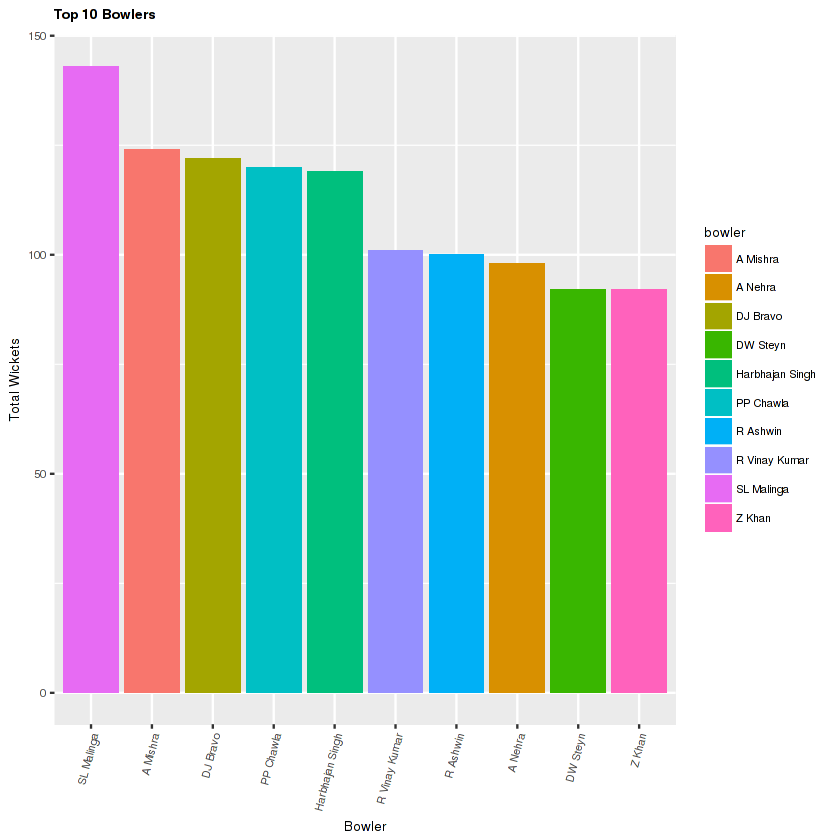

In [3]:
#Top 10 bowlers(Highest WicketTakers)
df1 %>% 
  group_by(bowler) %>% 
  summarise(total_wickets = length(dismissal_kind[dismissal_kind%in% c("caught","bowled","lbw","stumped","caught and bowled","hit wicket")])) %>% 
  arrange(desc(total_wickets)) %>% 
  top_n(n= 10, wt = total_wickets) %>% 
  ggplot(aes(x = reorder(bowler, -total_wickets), y= total_wickets))+
  geom_bar(aes(fill= bowler), stat = "identity")+
  labs(list(title = "Top 10 Bowlers", x = "Bowler", y = "Total Wickets"))+
  theme(axis.text.x=element_text(angle=75, hjust=1), plot.title = element_text(size = 8, face = "bold"),text = element_text(size=8))

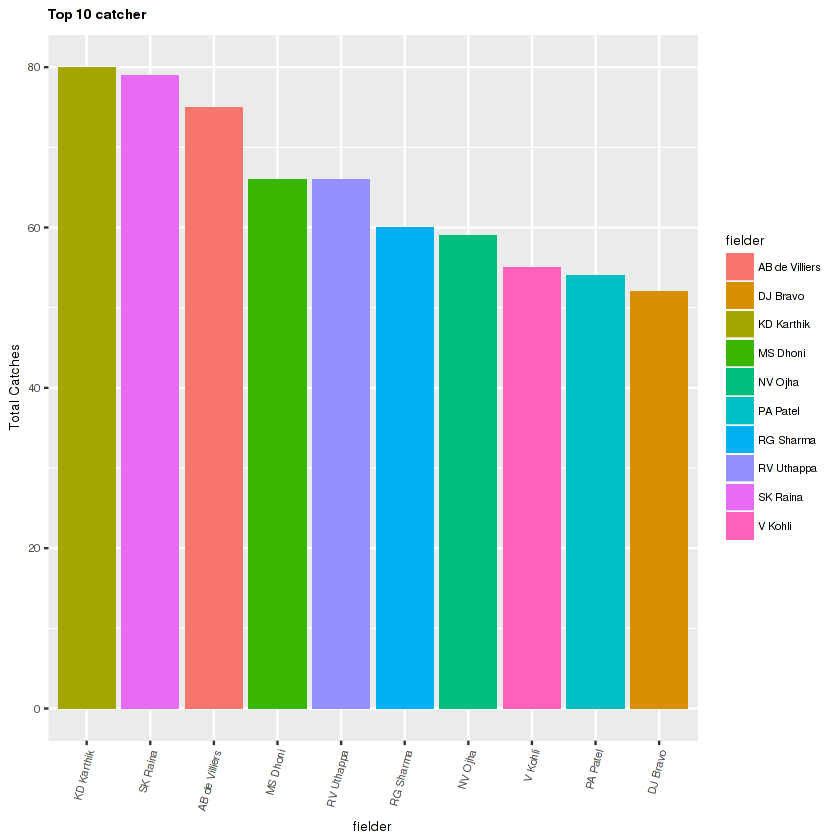

In [4]:
#Top 10 Catchers
df1 %>% 
group_by(fielder) %>% 
summarise(total_catches = length(dismissal_kind[dismissal_kind=="caught"])) %>% 
arrange(desc(total_catches)) %>% 
top_n(n= 10, wt = total_catches) %>% 
ggplot(aes(x = reorder(fielder, -total_catches), y= total_catches))+
geom_bar(aes(fill= fielder), stat = "identity")+
labs(list(title = "Top 10 catcher", x = "fielder", y = "Total Catches"))+
theme(axis.text.x=element_text(angle=75, hjust=1), plot.title = element_text(size = 8, face = "bold"),text = element_text(size=8))

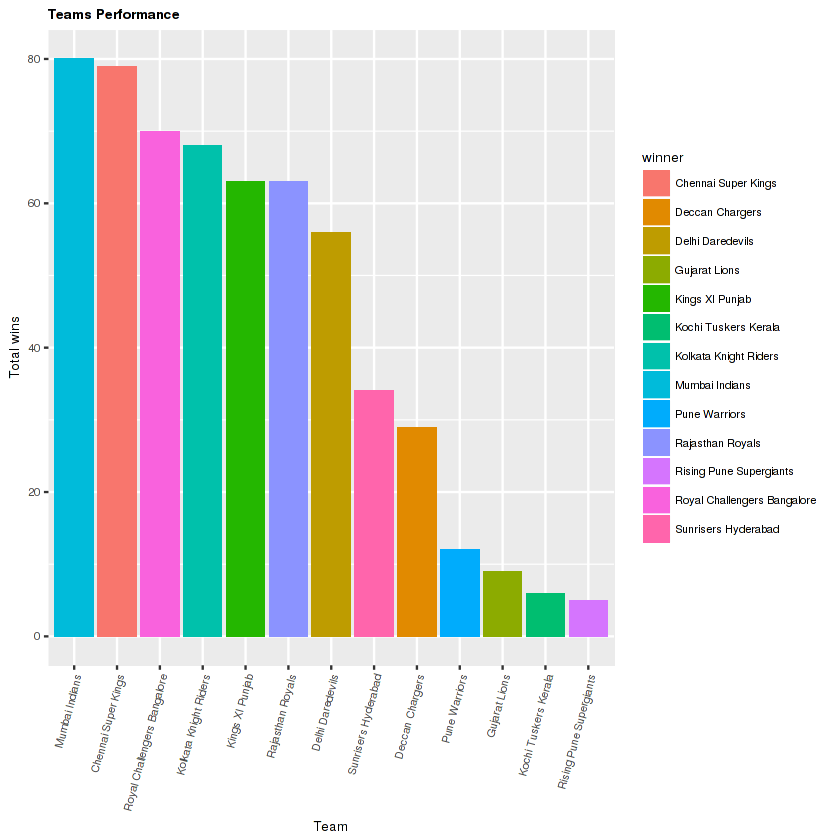

In [5]:
#Number of wins for each ipl team
df %>% 
  filter(result == "normal" | result == "tie") %>% 
  group_by(winner) %>% 
  summarise(total_win = n_distinct(match_id)) %>%  
  ggplot(aes(x = reorder(winner, -total_win), y = total_win))+geom_bar(aes(fill = winner), stat = "identity")+
  labs(list(title = "Teams Performance", x = "Team", y = "Total wins"))+
  theme(axis.text.x=element_text(angle=75, hjust=1), plot.title = element_text(size = 8, face = "bold"),text = element_text(size=8))

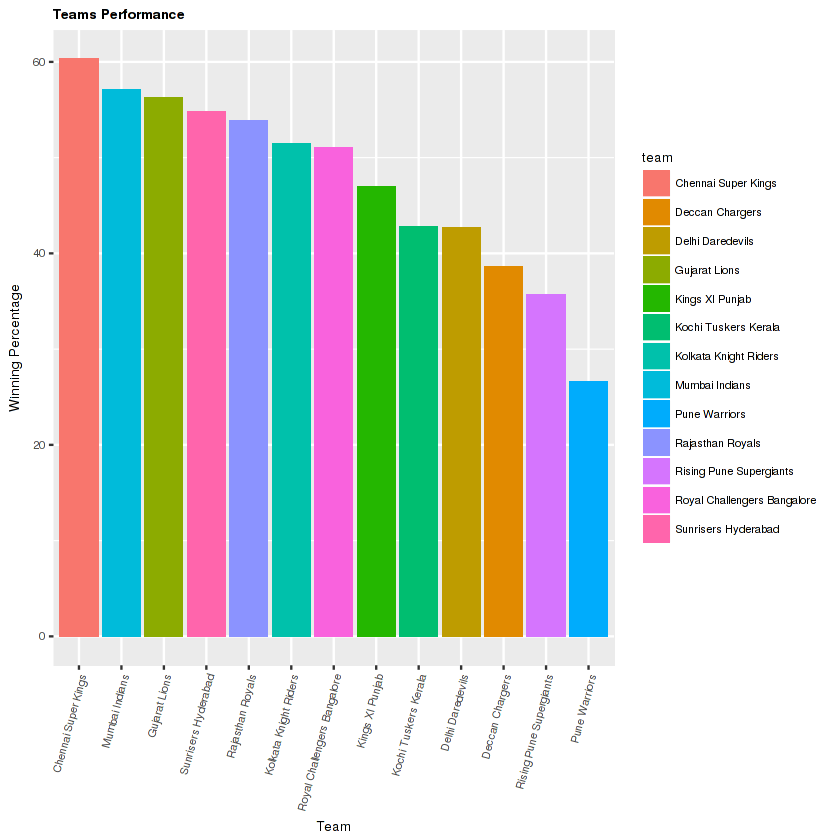

In [6]:
#Winning Percentage
df_teams<-(as.data.frame(unique(df$team1)))
colnames(df_teams)[1]<-"team"
df_wins<-df %>% 
         filter(result == "normal" | result == "tie") %>% 
         group_by(winner) %>% 
         summarise(total_win = n_distinct(match_id)) 

df_teams<-merge(df_teams, df_wins, by.x = "team", by.y = "winner")

df_total_matches<-df %>% 
  filter(result=="normal" | result=="tie") %>% 
  group_by(batting_team) %>% 
  summarise(total_matches = n_distinct(match_id))
df_teams<-merge(df_teams, df_total_matches, by.x = "team", by.y = "batting_team")

df_teams<-df_teams %>% 
          mutate(winning_perc = (total_win/total_matches)*100)

df_teams %>% 
  ggplot(aes(x= reorder(team, -winning_perc), y= winning_perc))+
  geom_bar(aes(fill = team), stat = "identity")+
  labs(list(title = "Teams Performance", x = "Team", y = "Winning Percentage"))+
  theme(axis.text.x=element_text(angle=75, hjust=1), plot.title = element_text(size = 8, face = "bold"),text = element_text(size=8))


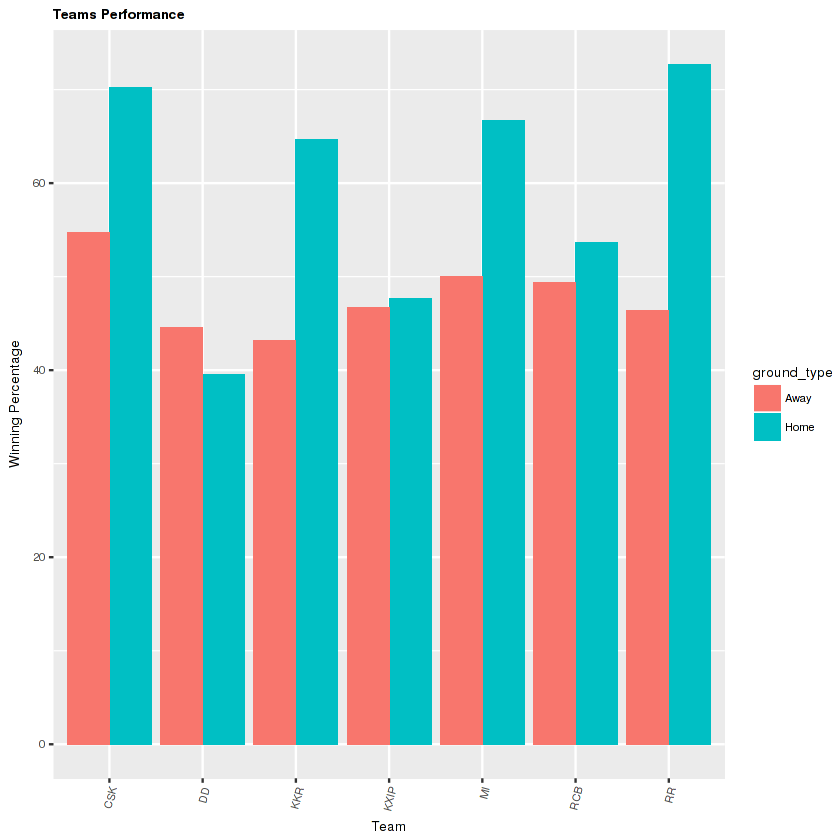

In [7]:
#Team Performance at Home ground and Away
t<-df %>% 
  filter((result=="normal" | result == "tie") & batting_team %in% c("Kolkata Knight Riders", "Royal Challengers Bangalore",
                                                                    "Chennai Super Kings","Kings XI Punjab","Rajasthan Royals",
                                                                    "Delhi Daredevils","Mumbai Indians"))

#KKR Perforamance
kkr_match_played<-t %>% 
  filter(batting_team=="Kolkata Knight Riders") %>% 
  mutate(ground_type = if_else(city == "Kolkata","Home","Away")) %>% 
  group_by(ground_type) %>% 
  summarise(total_match_played = n_distinct(match_id))

kkr_match_won<-t %>% 
  filter(batting_team=="Kolkata Knight Riders" & winner == "Kolkata Knight Riders") %>% 
  mutate(ground_type = if_else(city == "Kolkata","Home","Away")) %>% 
  group_by(ground_type) %>% 
  summarise(total_win = n_distinct(match_id))

KKR<-merge(kkr_match_played, kkr_match_won, by ="ground_type")

KKR<-KKR %>% 
  mutate(winning_perc = (total_win/total_match_played)*100,
         team = "KKR") 

#Chennai Super Kings
csk_match_played<-t %>% 
  filter(batting_team=="Chennai Super Kings") %>% 
  mutate(ground_type = if_else(city == "Chennai","Home","Away")) %>% 
  group_by(ground_type) %>% 
  summarise(total_match_played = n_distinct(match_id))

csk_match_won<-t %>% 
  filter(batting_team=="Chennai Super Kings" & winner == "Chennai Super Kings") %>% 
  mutate(ground_type = if_else(city == "Chennai","Home","Away")) %>% 
  group_by(ground_type) %>% 
  summarise(total_win = n_distinct(match_id))

CSK<-merge(csk_match_played, csk_match_won, by ="ground_type")

CSK<-CSK %>% 
  mutate(winning_perc = (total_win/total_match_played)*100,
         team ="CSK") 

#Mumbai Indians
mi_match_played<-t %>% 
  filter(batting_team=="Mumbai Indians") %>% 
  mutate(ground_type = if_else(city == "Mumbai","Home","Away")) %>% 
  group_by(ground_type) %>% 
  summarise(total_match_played = n_distinct(match_id))

mi_match_won<-t %>% 
  filter(batting_team=="Mumbai Indians" & winner == "Mumbai Indians") %>% 
  mutate(ground_type = if_else(city == "Mumbai","Home","Away")) %>% 
  group_by(ground_type) %>% 
  summarise(total_win = n_distinct(match_id))

MI<-merge(mi_match_played, mi_match_won, by ="ground_type")

MI<-MI %>% 
  mutate(winning_perc = (total_win/total_match_played)*100,
         team= "MI") 

#Kings XI punjab
KXIP_match_played<-t %>% 
  filter(batting_team=="Kings XI Punjab") %>% 
  mutate(ground_type = if_else(city == "Chandigarh","Home","Away")) %>% 
  group_by(ground_type) %>% 
  summarise(total_match_played = n_distinct(match_id))

KXIP_match_won<-t %>% 
  filter(batting_team=="Kings XI Punjab" & winner == "Kings XI Punjab") %>% 
  mutate(ground_type = if_else(city == "Chandigarh","Home","Away")) %>% 
  group_by(ground_type) %>% 
  summarise(total_win = n_distinct(match_id))

KXIP<-merge(KXIP_match_played, KXIP_match_won, by ="ground_type")

KXIP<-KXIP %>% 
  mutate(winning_perc = (total_win/total_match_played)*100,
         team="KXIP") 
#Rajasthan Royal
RR_match_played<-t %>% 
  filter(batting_team=="Rajasthan Royals") %>% 
  mutate(ground_type = if_else(city == "Jaipur","Home","Away")) %>% 
  group_by(ground_type) %>% 
  summarise(total_match_played = n_distinct(match_id))

RR_match_won<-t %>% 
  filter(batting_team=="Rajasthan Royals" & winner == "Rajasthan Royals") %>% 
  mutate(ground_type = if_else(city == "Jaipur","Home","Away")) %>% 
  group_by(ground_type) %>% 
  summarise(total_win = n_distinct(match_id))

RR<-merge(RR_match_played, RR_match_won, by ="ground_type")

RR<-RR %>% 
  mutate(winning_perc = (total_win/total_match_played)*100,
         team = "RR") 

#Royal Challengers Bangalore
RCB_match_played<-t %>% 
  filter(batting_team=="Royal Challengers Bangalore") %>% 
  mutate(ground_type = if_else(city == "Bangalore","Home","Away")) %>% 
  group_by(ground_type) %>% 
  summarise(total_match_played = n_distinct(match_id))

RCB_match_won<-t %>% 
  filter(batting_team=="Royal Challengers Bangalore" & winner == "Royal Challengers Bangalore") %>% 
  mutate(ground_type = if_else(city == "Bangalore","Home","Away")) %>% 
  group_by(ground_type) %>% 
  summarise(total_win = n_distinct(match_id))

RCB<-merge(RCB_match_played, RCB_match_won, by ="ground_type")

RCB<-RCB %>% 
  mutate(winning_perc = (total_win/total_match_played)*100,
         team ="RCB")

#Delhi Daredevils

DD_match_played<-t %>% 
  filter(batting_team=="Delhi Daredevils") %>% 
  mutate(ground_type = if_else(city == "Delhi","Home","Away")) %>% 
  group_by(ground_type) %>% 
  summarise(total_match_played = n_distinct(match_id))

DD_match_won<-t %>% 
  filter(batting_team=="Delhi Daredevils" & winner == "Delhi Daredevils") %>% 
  mutate(ground_type = if_else(city == "Delhi","Home","Away")) %>% 
  group_by(ground_type) %>% 
  summarise(total_win = n_distinct(match_id))

DD<-merge(DD_match_played, DD_match_won, by ="ground_type")

DD<-DD %>% 
  mutate(winning_perc = (total_win/total_match_played)*100,
         team = "DD")


team_performances<-rbind(CSK, DD,KKR,MI,KXIP,RCB,RR)

team_performances %>% 
ggplot(aes(x = team, y =winning_perc,fill = ground_type))+
  geom_bar(stat = "identity", position = "dodge")+
  labs(list(title = "Teams Performance", x = "Team", y = "Winning Percentage"))+
  theme(axis.text.x=element_text(angle=75, hjust=1), plot.title = element_text(size = 8, face = "bold"),text = element_text(size=8))

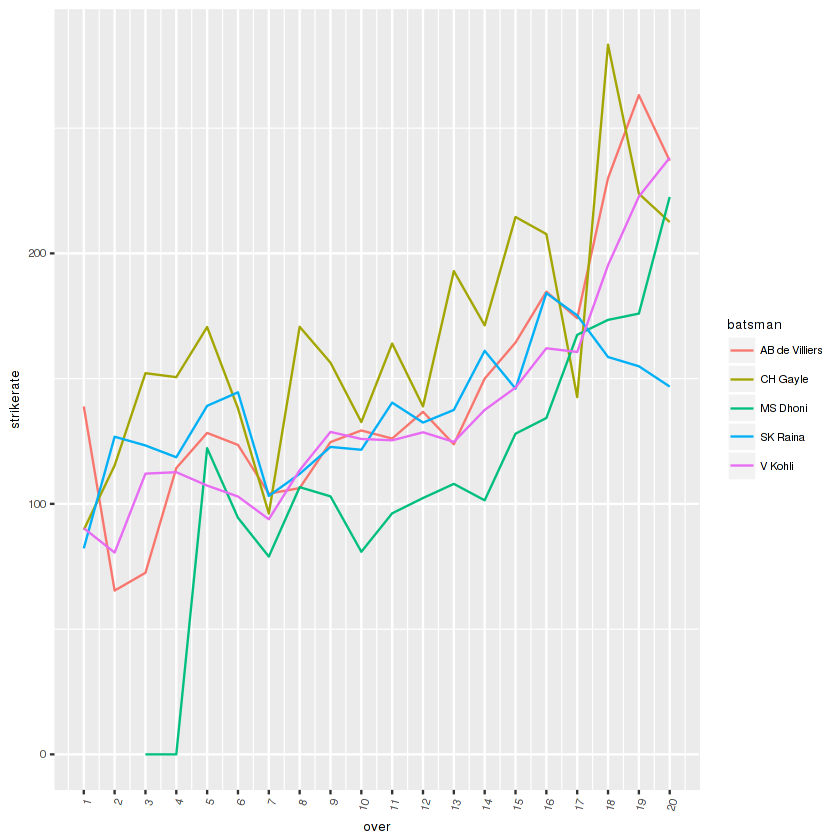

In [8]:
#ABD Villers Vs Dhoni Vs V Kohli Vs Chris Gayle Vs SK Raina (Innings Progression)
df %>% 
  filter(batsman %in% c("AB de Villiers","V Kohli", "MS Dhoni", "CH Gayle","SK Raina"))%>% 
  group_by(batsman,over) %>% 
  summarise(runs = sum(batsman_runs),
            balls_faced = length(batsman),
            strikerate = round((runs/balls_faced)*100,2)) %>% 
  ggplot(aes(over, strikerate, color = batsman))+
  geom_line(stat = "identity")+
  scale_x_continuous(breaks = seq(1,20,1))+
  theme(axis.text.x=element_text(angle=75, hjust=1), plot.title = element_text(size = 8, face = "bold"),text = element_text(size=8))


`geom_smooth()` using method = 'loess'


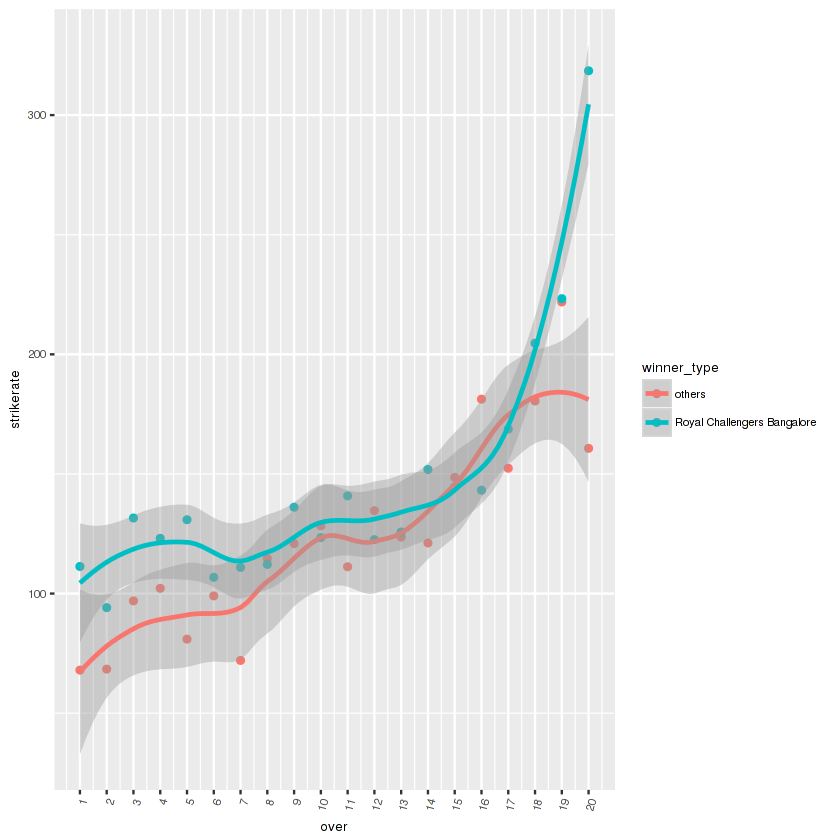

In [9]:
#Virat Kohli Innings Comparison when RCB wins VS RCB Looses
df %>% 
  filter(batsman %in% c("V Kohli"))%>%
  mutate(winner_type = if_else(winner =="Royal Challengers Bangalore", "Royal Challengers Bangalore", "others")) %>% 
  group_by(winner_type,over) %>% 
  summarise(runs = sum(batsman_runs),
            balls_faced = length(batsman),
            strikerate = round((runs/balls_faced)*100,2)) %>% 
  ggplot(aes(over, strikerate, color = winner_type))+
  geom_point(stat = "identity")+
  geom_smooth(span = 0.5)+
  scale_x_continuous(breaks = seq(1,20,1))+
  theme(axis.text.x=element_text(angle=75, hjust=1), plot.title = element_text(size = 8, face = "bold"),text = element_text(size=8))

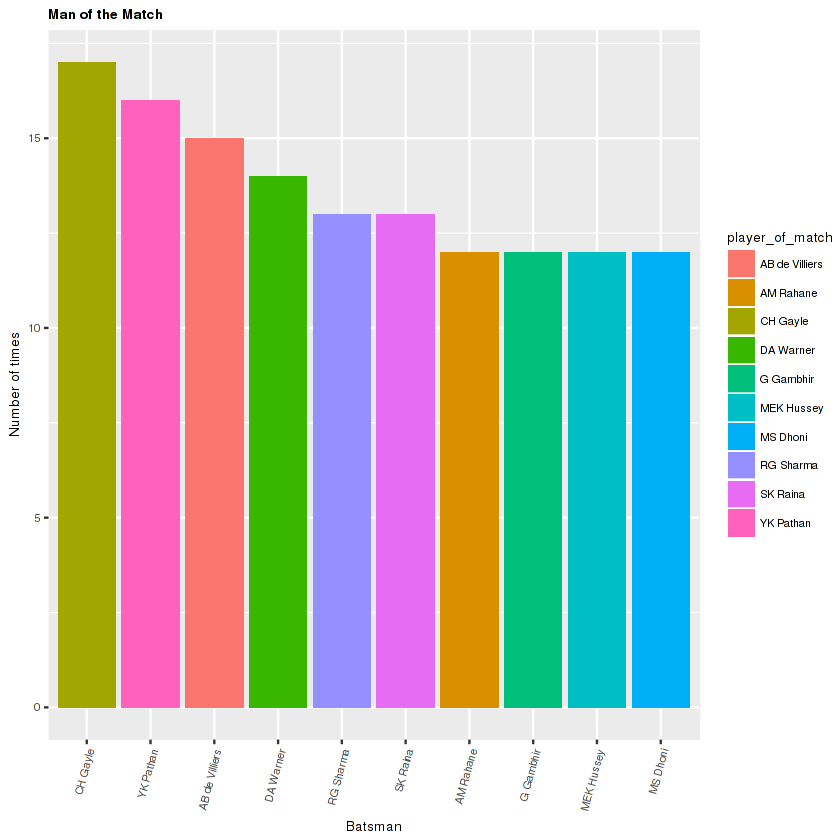

In [10]:
#Number of times Man of Matches Awards
df2 %>% 
  group_by(player_of_match) %>% 
  summarise(No_times = n()) %>% 
  arrange(desc(No_times)) %>% 
  top_n(n=10, wt = No_times) %>% 
  ggplot(aes(x = reorder(player_of_match, -No_times), y = No_times))+
  geom_bar(aes(fill = player_of_match),stat = "identity")+
  labs(list(title = "Man of the Match", x = "Batsman", y = "Number of times"))+
  theme(axis.text.x=element_text(angle=75, hjust=1), plot.title = element_text(size = 8, face = "bold"),text = element_text(size=8))

In [12]:
#Top 10 Most Economical Bowler in depth overs (Over no. 16 to 20)(bowled atleast 50 overs in total)?
df1 %>% 
	filter(over > 15) %>% 
	group_by(bowler) %>% 
	summarise(total_runs_given = sum(total_runs),
						total_overs = round(length(ball)/6,1),
						economy_rate = round(total_runs_given/total_overs,2)) %>% 
	filter(total_overs> 50) %>% 
	arrange((economy_rate)) %>% 
	top_n(n = 10, wt =  -economy_rate)

bowler,total_runs_given,total_overs,economy_rate
SL Malinga,1172,162.3,7.22
SP Narine,718,98.3,7.30
R Ashwin,479,63.2,7.58
DW Steyn,806,104.0,7.75
RA Jadeja,521,62.0,8.40
PP Chawla,449,53.3,8.42
CH Morris,428,50.5,8.48
B Lee,465,54.7,8.50
B Kumar,802,93.5,8.58
DS Kulkarni,452,52.0,8.69


In [13]:
#Top 10 Wicket Taking bowler in depth Overs(Over no. 16 to 20) with Economy Rate?
df1 %>% 
	filter(over > 15) %>% 
	group_by(bowler) %>% 
	summarise(total_wickets = length(dismissal_kind[dismissal_kind%in% c("caught","bowled","lbw","stumped","caught and bowled","hit wicket")]),
						total_runs_given = sum(total_runs),
						total_overs = round(length(ball)/6,1),
						economy_rate = round(total_runs_given/total_overs,2)) %>% 
	arrange(desc(total_wickets)) %>% 
	top_n(n = 10, wt =  total_wickets) %>% 
	select(bowler,total_wickets, economy_rate)

bowler,total_wickets,economy_rate
SL Malinga,92,7.22
DJ Bravo,72,8.81
SP Narine,50,7.30
DW Steyn,49,7.75
A Nehra,48,8.83
B Kumar,45,8.58
RP Singh,45,9.03
R Vinay Kumar,45,10.13
UT Yadav,39,9.49
SR Watson,37,8.97


In [14]:
#Top 10 Highest Wicket Taking bowler with Economy in All season
df1 %>% 
	group_by(bowler) %>% 
	summarise(total_wickets = length(dismissal_kind[dismissal_kind%in% c("caught","bowled","lbw","stumped","caught and bowled","hit wicket")]),
						total_runs_given = sum(total_runs),
						total_overs = round(length(ball)/6,1),
						economy_rate = round(total_runs_given/total_overs,2)) %>% 
	arrange(desc(total_wickets)) %>% 
	top_n(n = 10, wt =  total_wickets) %>% 
	select(bowler,total_wickets, economy_rate)

bowler,total_wickets,economy_rate
SL Malinga,143,6.60
A Mishra,124,7.20
DJ Bravo,122,8.00
PP Chawla,120,7.61
Harbhajan Singh,119,6.97
R Vinay Kumar,101,8.25
R Ashwin,100,6.49
A Nehra,98,7.62
DW Steyn,92,6.60
Z Khan,92,7.50


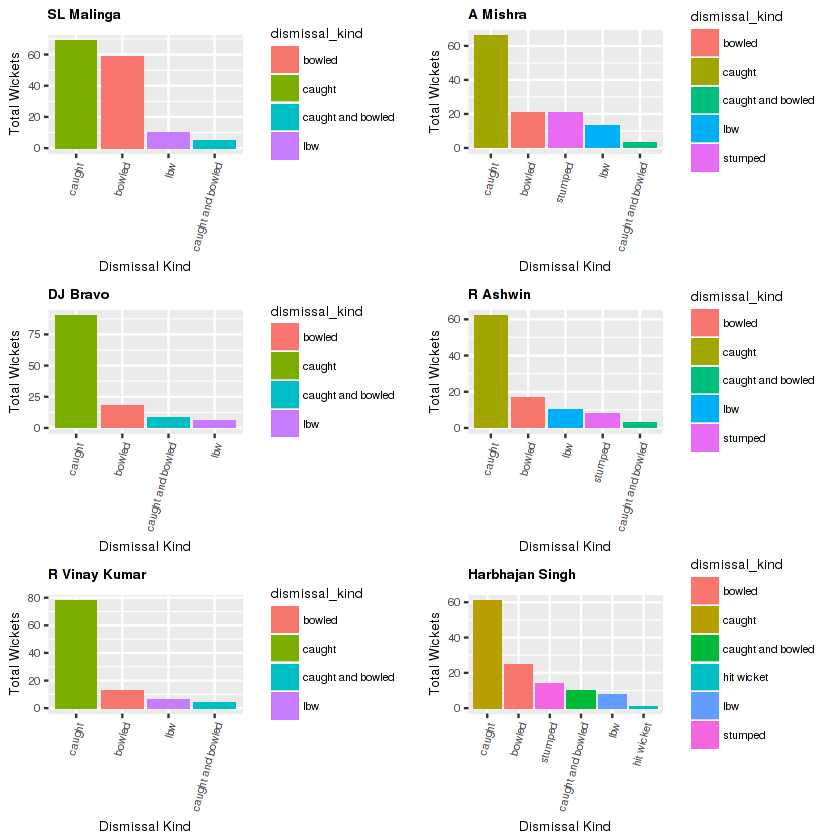

In [15]:
#Dismissal Kind (Malinga Vs Bravo Vs VinayKumar Vs Mishra Vs Ashwin Vs Harbhajan)
bowl<-function(type){
	x<-df1 %>% 
		filter(bowler==type & dismissal_kind %in% c("caught","bowled","lbw","stumped","caught and bowled", "hit wicket")) %>% 
		group_by(dismissal_kind) %>% 
		summarise(total = n()) %>% 
		arrange(desc(total)) %>% 
		top_n(n= 10, wt = total)
	p<- ggplot(aes(x = reorder(dismissal_kind, -total), y= total), data = x)+
		geom_bar(aes(fill= dismissal_kind), stat = "identity")+
		labs(list(title = type, x = "Dismissal Kind", y = "Total Wickets"))+
        theme(axis.text.x=element_text(angle=75, hjust=1), plot.title = element_text(size = 8, face = "bold"),text = element_text(size=8))
	return(p)
}

a1<-bowl("SL Malinga")
a2<-bowl("A Mishra")
a3<-bowl("DJ Bravo")
a4<-bowl("R Ashwin")
a5<-bowl("Harbhajan Singh")
a6<-bowl("R Vinay Kumar")

grid.arrange(a1,a2,a3,a4,a6,a5, nrow =3, ncol=2)

`geom_smooth()` using method = 'loess'


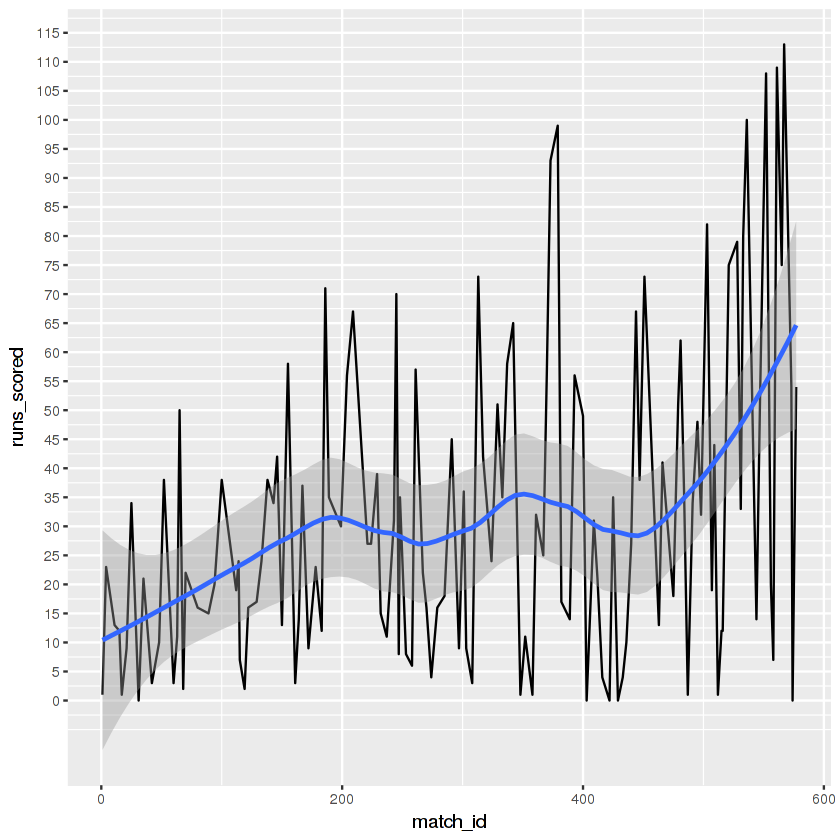

In [16]:
#Virat Kohli performances 
df %>% 
	filter(batsman == "V Kohli") %>% 
	group_by(match_id) %>% 
	summarise(runs_scored = sum(batsman_runs))%>% 
	select(match_id,runs_scored) %>% 
	ggplot(aes(match_id,runs_scored))+
	geom_line(stat = "identity")+
	scale_y_continuous(breaks = seq(0,150,5))+
	geom_smooth(span = 0.5)

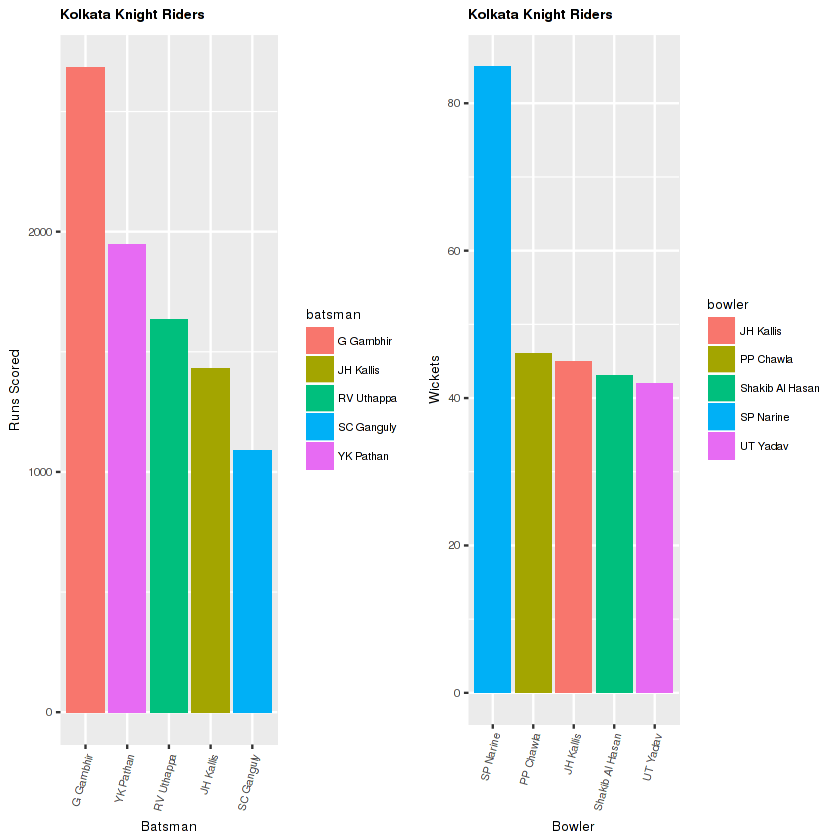

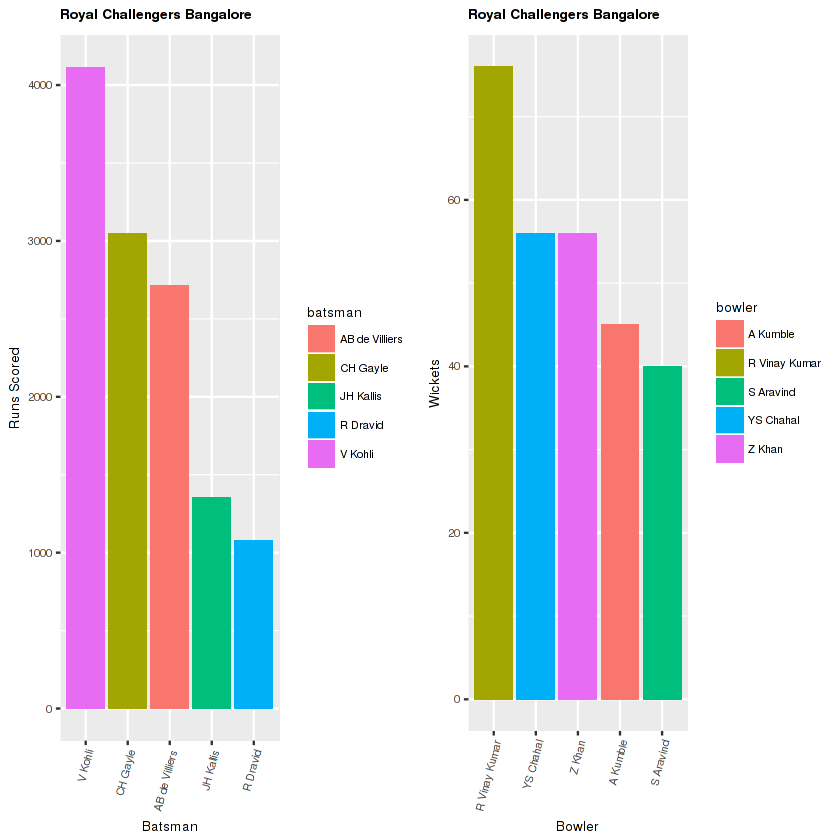

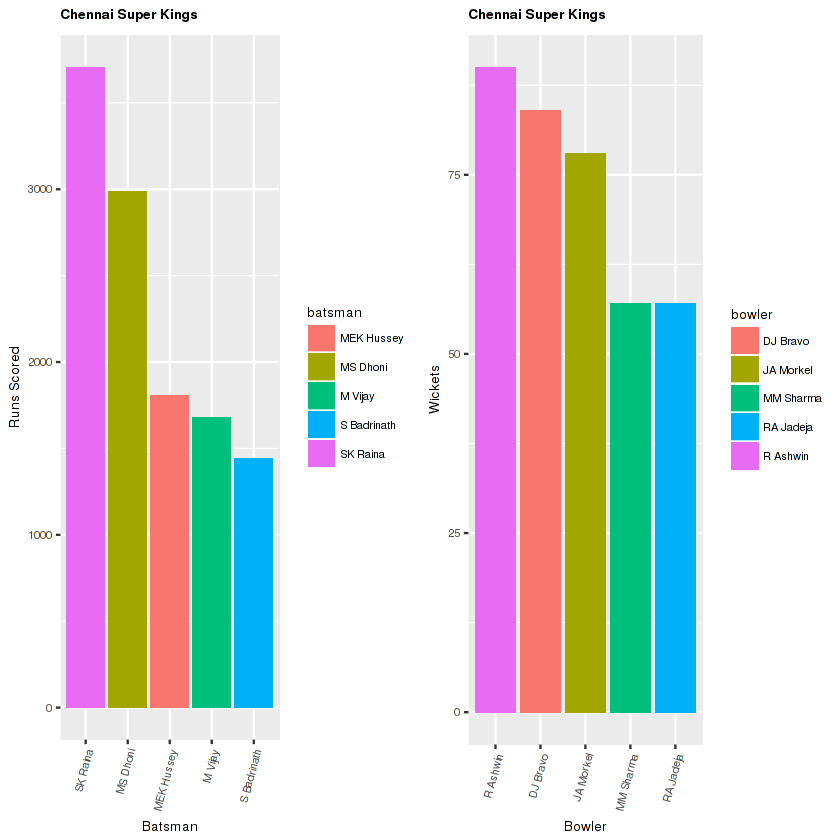

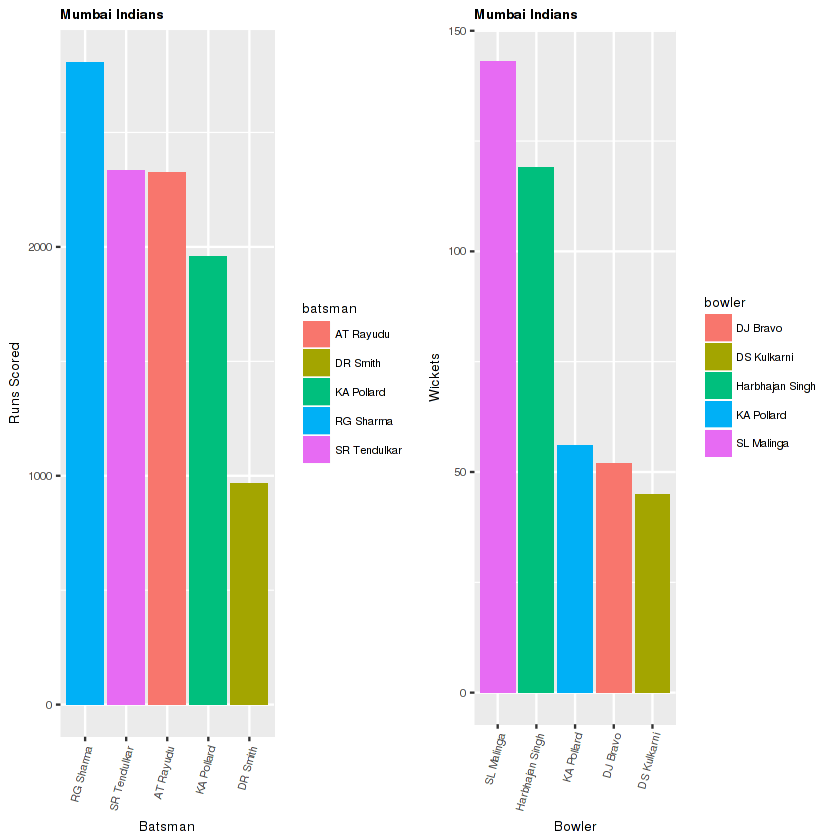

In [17]:
#KeyPlayers for MI, CSK, KKR and RCB
keyplayers<-function(type){
	bats<-df%>% 
		filter(team1 == type | team2 == type) %>% 
		group_by(batsman) %>% 
		summarise(runs_scored = sum(batsman_runs)) %>% 
		arrange(desc(runs_scored)) %>% 
		top_n(n= 5, wt = runs_scored)
	
	bowls<-df%>% 
		filter(team1 == type | team2 == type) %>% 
		group_by(bowler) %>% 
		summarise(total_wickets = length(dismissal_kind[dismissal_kind%in% c("caught","bowled","lbw","stumped","caught and bowled","hit wicket")])) %>% 
		arrange(desc(total_wickets)) %>% 
		top_n(n= 5, wt = total_wickets)
	
	a1<-ggplot(aes(x = reorder(batsman, -runs_scored),y = runs_scored), data =  bats)+
		geom_bar(stat  = "identity", aes(fill = batsman))+
		labs(list(title = type, x = "Batsman", y = "Runs Scored"))+
        theme(axis.text.x=element_text(angle=75, hjust=1), plot.title = element_text(size = 8, face = "bold"),text = element_text(size=8))
	
	a2<-ggplot(aes(x = reorder(bowler, -total_wickets),y = total_wickets), data = bowls)+
		geom_bar(stat = "identity", aes(fill = bowler))+
		labs(list(title = type, x = "Bowler", y = "Wickets"))+
        theme(axis.text.x=element_text(angle=75, hjust=1), plot.title = element_text(size = 8, face = "bold"),text = element_text(size=8))

	return(grid.arrange(a1,a2, nrow = 1, ncol =2))
	
}
keyplayers("Kolkata Knight Riders")
keyplayers("Royal Challengers Bangalore")
keyplayers("Chennai Super Kings")
keyplayers("Mumbai Indians")

